In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
#Importing data
df = pd.read_csv('FINAL_DATA.csv')
train=df[0:80] 
test=df[80:]
from statsmodels.tsa.api import ExponentialSmoothing


In [2]:
train['GDP']

0      91094.654
1      84069.191
2     105107.404
3     106974.062
4      98541.030
         ...    
75    532901.775
76    511768.605
77    516638.841
78    527752.698
79    547626.382
Name: GDP, Length: 80, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


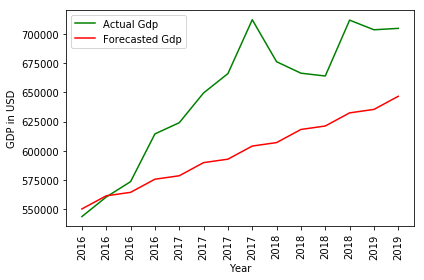

In [3]:

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['GDP']) ,seasonal_periods=2 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))



x= [2016,2016,2016,2016,2017,2017,2017,2017,2018,2018,2018,2018,2019,2019]
plt.plot(list(test['GDP']), label='Actual Gdp',color='green')
plt.plot(list(y_hat_avg['Holt_Winter']),color='red',label='Forecasted Gdp')

plt.xlabel('Year')
xi = list(range(len(x)))
plt.ylabel('GDP in USD') 
plt.xticks(xi,x,rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('HW.png')
plt.show()

 

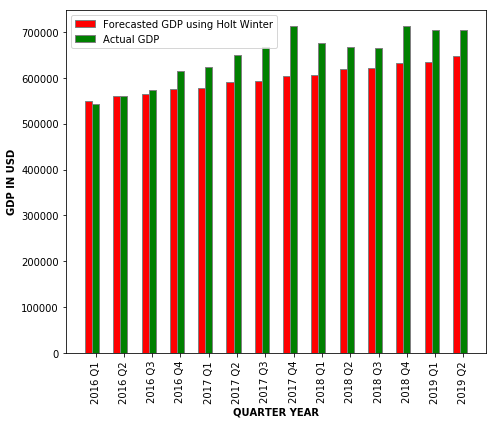

In [4]:
p=list(y_hat_avg['Holt_Winter'])
t=list(test['GDP'])
barWidth = 0.25
fig = plt.subplots(figsize =(7, 6))    
# Set position of bar on X axis 
br1 = np.arange(14) 
br2 = [x + barWidth for x in br1] 

   
# Make the plot 
plt.bar(br1, p, color ='r', width = barWidth, edgecolor ='grey', label='Forecasted GDP using Holt Winter') 
plt.bar(br2, t, color ='g', width = barWidth, edgecolor ='grey', label='Actual GDP') 

   
# Adding Xticks  
plt.xlabel('QUARTER YEAR', fontweight ='bold') 
plt.ylabel('GDP IN USD', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(t))], 
           ['2016 Q1','2016 Q2','2016 Q3','2016 Q4','2017 Q1','2017 Q2','2017 Q3','2017 Q4','2018 Q1','2018 Q2','2018 Q3','2018 Q4','2019 Q1','2019 Q2'], rotation=90) 
plt.legend()
plt.tight_layout()
plt.savefig('HW_bar.png')   
plt.show()     
    

In [5]:
y_hat_avg.Holt_Winter


80    550116.315562
81    561370.281115
82    564336.770522
83    575590.736075
84    578557.225483
85    589811.191036
86    592777.680443
87    604031.645996
88    606998.135403
89    618252.100956
90    621218.590364
91    632472.555917
92    635439.045324
93    646693.010877
Name: Holt_Winter, dtype: float64

In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['GDP'], y_hat_avg.Holt_Winter))
print(rms)


58387.82794248274


In [5]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs(y_true - y_pred) / y_true) * 100
mape = mean_absolute_percentage_error(test['GDP'], y_hat_avg.Holt_Winter)
mape

7.5061402424545065